In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [12]:
class minimal_network(object):
    def __init__(self, N, alpha = 0.00001):
        self.input_size = 2
        self.output_size = 1
        self.hidden_size = N
        self.w32 = np.zeros((1,N))
        self.alpha = alpha
    
    def init_tuning_curves(self, O1, O2, sigma, color1, color2, plot = True, difference = False):
        x = np.linspace(-20, 20, self.hidden_size)
        def normal_dist(x , mean , sd):
            prob_density = (1/np.sqrt((np.pi*(sd**2))) * np.exp(-0.5*((x-mean)/sd)**2))
            return prob_density
        pdf1 = normal_dist(x, O1, sigma)
        pdf1 = pdf1/np.max(pdf1)
        pdf2 = normal_dist(x, O2, sigma)
        pdf2 = pdf2/np.max(pdf2)
        d = pdf2 - pdf1
        self.w21 = np.array([pdf1, pdf2]).T
        
        if plot == True:
            plt.plot(x, pdf1, color = color1);
            plt.plot(x, pdf2, color = color2);
            plt.xlabel('Angle');
            plt.ylabel('Response');
            
        if difference == True:
            plt.plot(x, d, color = "red")
    
    def input(self, input_matrix):
        self.input = input_matrix
    def desired_output(self, output_matrix):
        self.desired_output = output_matrix
    def forward(self,X):
        a2 = self.w21@X
        yhat = self.w32@a2
        return yhat
    def train(self, iterations):
        self.train = iterations
        self.error = []

        for i in range(iterations):
            for j in range(len(self.input)):
                x = self.input[:,j].reshape([2,1])
                y = self.desired_output[j]
                yhat = self.forward(x)
                self.error.append(np.linalg.norm(y-yhat)**2)
                dw21 = -2 * self.w32.T@((y - yhat)*x.T)
                dw32 = -2 * (y - yhat)*(self.w21@x).T
                self.w21 = self.w21 - self.alpha*dw21
                self.w32 = self.w32 - self.alpha*dw32
                
    def plot_loss(self, color):
        plt.plot(np.asarray(self.error), color = color)
        plt.xlabel("Time (epochs)")
        plt.ylabel("Error")




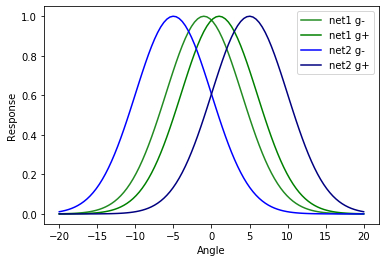

In [107]:
net = minimal_network(N=100, alpha = 0.001)
net.init_tuning_curves(O1 = -1, O2 = 1, sigma = 5, color1 = "forestgreen", color2 = "green", plot = True)
net.input = np.array([[1,0], [0,1]])
net.desired_output = np.array([1, -1])
net.train(iterations = 5000)

net2 = minimal_network(N=100, alpha = 0.001)
net2.init_tuning_curves(O1 = -5, O2 = 5, sigma = 5, color1 = "blue", color2 = "navy", plot = True)
net2.input = np.array([[1,0], [0,1]])
net2.desired_output = np.array([1, -1])
net2.train(iterations = 5000)

plt.legend(["net1 g-", "net1 g+", "net2 g-", "net2 g+"], loc = 'upper right')

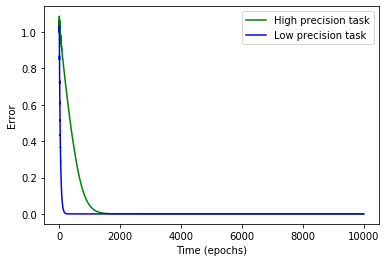

In [101]:
net.plot_loss("green")
net2.plot_loss("blue")
plt.legend(["High precision task", "Low precision task"])

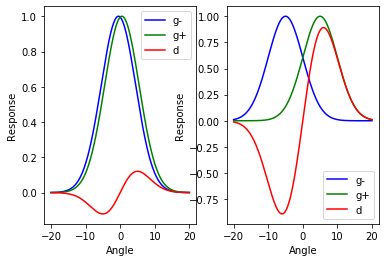

In [105]:
plt.subplot(1,2,1)
net = minimal_network(N=1000)
net.init_tuning_curves(O1 = -0.5, O2 = 0.5, sigma = 5, color1 = "blue", color2 = "green", plot = True, difference = True)
plt.legend(["g-", "g+", "d"])

plt.subplot(1, 2,2)
net2 = minimal_network(N=1000)
net2.init_tuning_curves(O1 = -5, O2 = 5, sigma = 5, color1 = "blue", color2 = "green", plot = True, difference = True)
plt.legend(["g-", "g+", "d"])

In [192]:
v = np.dot(d.T, gplus)
alpha = 0.2
beta = 0.2
c = 1


error = (np.sum((Y - yhat)**2))
da = beta * (c - v * beta * (1 + 2 * alpha)) * (1 + 2 * alpha)
db = (c - v * beta * (1 + 2 * alpha))*(1 + 2 * alpha)

alpha = alpha - da
beta = beta - db

w21 = w21 + alpha * np.array([d, -d]).reshape(1000,2)
w32 = beta * d.T



In [ ]:

N = int(1000)
x = np.linspace(-20, 20, N)

def normal_dist(x , mean , sd):
    prob_density = (1/np.sqrt((np.pi*(sd**2))) * np.exp(-0.5*((x-mean)/sd)**2))
    return prob_density

orientation = 5
sigma = 5

pdf1 = normal_dist(x, orientation, sigma)
pdf1 = pdf1/np.max(pdf1)
pdf2 = normal_dist(x, -orientation, sigma)
pdf2 = pdf2/np.max(pdf2)


# plt.plot(x,pdf1 , color = 'blue');
# plt.plot(x,pdf2 , color = 'green');
# plt.xlabel('Angle');
# plt.ylabel('Response');



w21 = np.array([pdf1, pdf2]).T
w32 = np.zeros((1,N))

X = np.array([[1,0], [0,1]])
Y = np.array([1, -1])

    
def forward(X):
    a2 = w21@X
    yhat = w32@a2
    return yhat

alpha = 0.00001
error = []

M = 5000

for i in range(M):
    for j in range(2):
        x = X[:,j].reshape([2,1])
        y = Y[j]
        yhat = forward(x)
        error.append(np.linalg.norm(y-yhat)**2)
        dw21 = -2 * w32.T@((y - yhat)*x.T)
        dw32 = -2 * (y - yhat)*(w21@x).T
        w21 = w21 - alpha*dw21
        w32 = w32 - alpha*dw32

plt.plot(np.asarray(error))
